# Assignments

## Assignment 2

### Data

Based off the my previous data need and what has been provided, the data given was not quite I had anticipated. Given that my initial proposal and expectations were highly ambitious, the data that has been provided has significantly less parameters. My initial proposal was very broad in scope with the intention of encompassing several areas of the WD-40 company as well as took into consideration a lot of associated stakeholders. While the provided data does includes foundational elements like `site`, `mode`, `region`, and `destination`  which will be useful for estimating transportation costs and identifying performance issues, it lacks the data needed for broader stakeholder analysis like I had originally hoped. 

A key challenge will be restructuring my proposal to fit this narrower scope, limiting cross-functional insights and reducing dashboard complexity. To address these challenges, I plan to refine my project scope to focus on transportation performance and cost allocations by leveraging the data I have available to me and by designing visuals that highlight key trends that will help support WD-40 in identifying areas of inefficiency as well assist in making informed decisions around transportation cost balancing.

### Data Expectation

In [42]:
# Set up shell for libraries, packages, and data

import pandas as pd
import numpy as np
from plotnine import *

transportation = pd.read_csv('../data/tr_data_22_24.csv')
transportation .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200549 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185843 non-null  object 
 3   region               208799 non-null  object 
 4   destination          208799 non-null  object 
 5   shipping_date        208799 non-null  object 
 6   invoice_date         208799 non-null  object 
 7   usda_invoice_amount  208799 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


In [16]:
transportation

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount,delay
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599,26 days
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398,1 days
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943,42 days
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393,6 days
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165,6 days
...,...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037,68 days
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800,5 days
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427,5 days
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601,4 days


In [17]:
# Calculate number of "non-null" values in each column

transportation.count(axis=0)

site                   200549
mode                   208157
division               185843
region                 208799
destination            208799
shipping_date          208799
invoice_date           208799
usda_invoice_amount    208799
delay                  208799
dtype: int64


After expoloring the initial data set, it has been determined that there are varying levels of data completeness across several columns. Most columns within the transportation data are fully populated, which is indicative of strong data integrity for key fields like "region", "destination", and invoicing details. However, "site", "mode", and  "division" show notable gaps. These discrepancies suggest potential issues in data collection or optional reporting, and may require cleaning or justification prior to further analysis.

In [19]:
# calculate average invoice amount

average_invoice = transportation['usda_invoice_amount'].mean()
print(f"Average USDA Invoice Amount: ${average_invoice:.2f}")


Average USDA Invoice Amount: $12779.14


In [20]:
# calculate minimum invoice amount

minimum_invoice = transportation['usda_invoice_amount'].min()
print(f"Minimum USDA Invoice Amount: ${minimum_invoice:.2f}")

Minimum USDA Invoice Amount: $0.01


In [21]:
# calculate maximum invoice amount

maximum_invoice = transportation['usda_invoice_amount'].max()
print(f"Maximum USDA Invoice Amount: ${maximum_invoice:.2f}")

Maximum USDA Invoice Amount: $192806.68


### Basic Visuals

C:\Users\ccono\AppData\Local\Temp\ipykernel_23424\1759989016.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


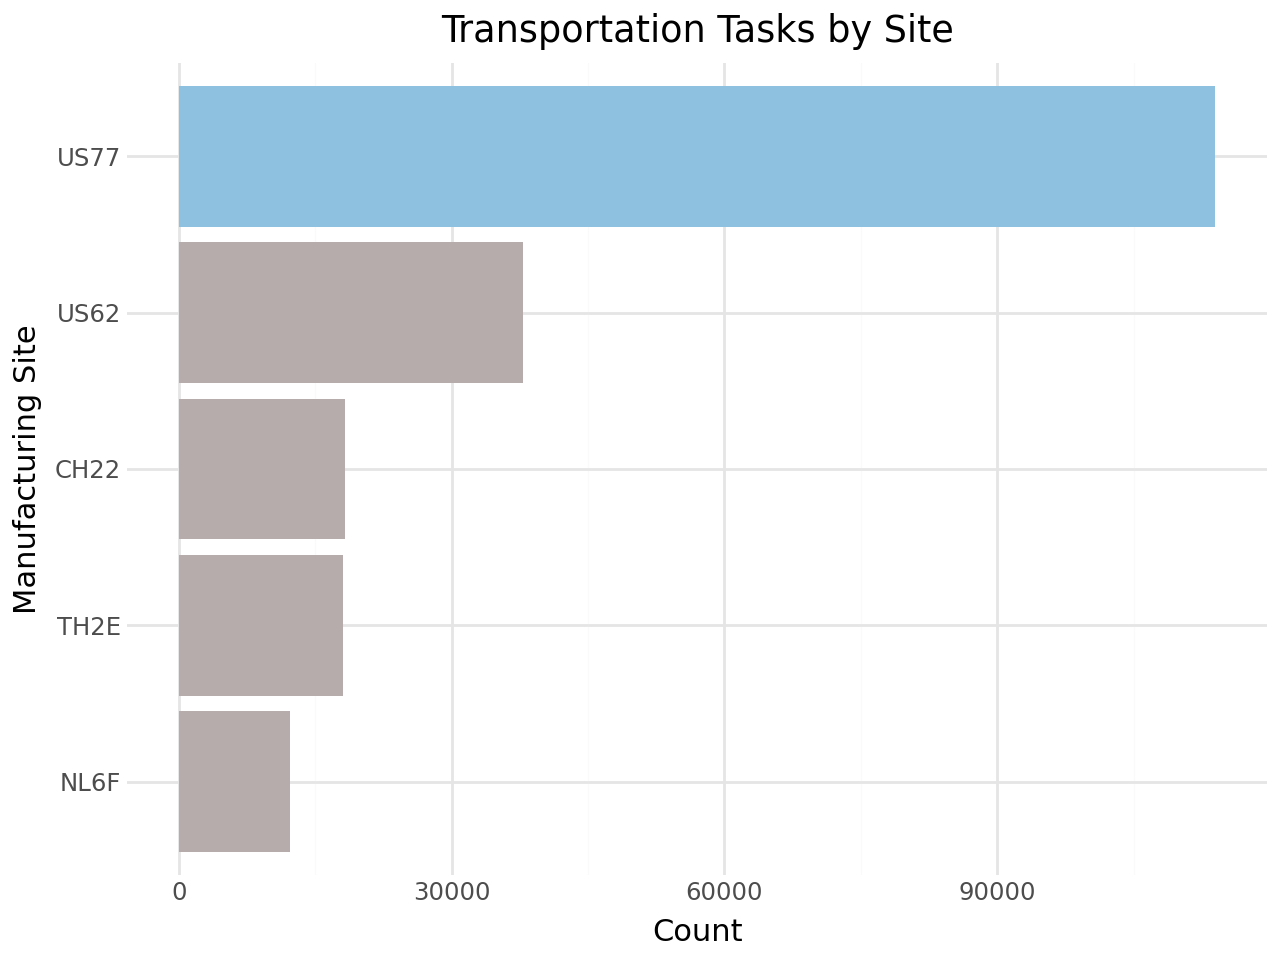

In [22]:
# create list of sites by total counts across regions 

site_region_counts = (transportation.groupby(['site', 'region']).size().reset_index(name='count'))
site_totals = site_region_counts.groupby('site')['count'].sum().sort_values(ascending=False).index.tolist()
site_region_counts['site'] = pd.Categorical(site_region_counts['site'], categories=site_totals[::-1], ordered=True)


# Custom colors for highlighting

top_site = {row['site']: "#b6acac" for _, row in site_region_counts.iterrows()}
top_site['US77'] = "#8EC1DF"


# create visualization for depicting site with largest tasks

p =ggplot(site_region_counts, aes(x='site', y='count', fill='site')) 

p + geom_bar(stat='identity') + \
    coord_flip() + \
        labs(title='Transportation Tasks by Site', x='Manufacturing Site', y='Count') + \
            scale_fill_manual(values=top_site) + \
                theme_minimal() +\
                    theme(legend_position='none')
    

Based off the visualization created and provided data, manufacturing site US77 has the most transportation tasks. 

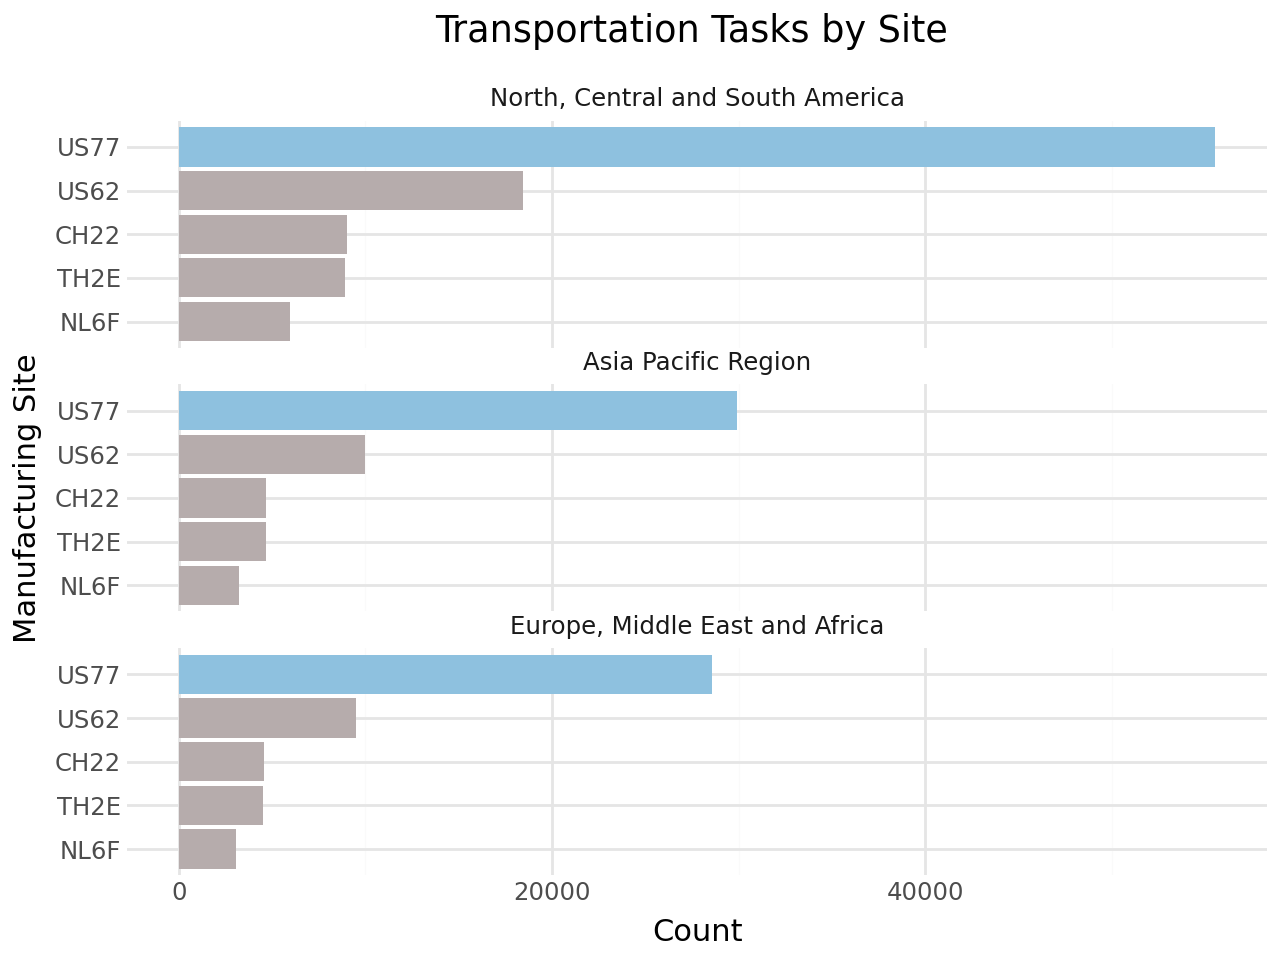

In [23]:
# visualizing tasks by site, broken down by region

top_site = {row['site']: "#b6acac" for _, row in site_region_counts.iterrows()}
top_site['US77'] = "#8EC1DF"

# Custom labels for facets
region_labels = {'AMER': 'North, Central and South America', 'APAC': 'Asia Pacific Region', 'EMEA': 'Europe, Middle East and Africa'}

p =ggplot(site_region_counts, aes(x='site', y='count', fill='site')) 

p + geom_bar(stat='identity') + \
    coord_flip() + \
        labs(title='Transportation Tasks by Site \n', x='Manufacturing Site', y='Count') + \
            scale_fill_manual(values=top_site) + \
                theme_minimal() +\
                    theme(legend_position ='none') + \
                        facet_wrap('~region', nrow=3, labeller=region_labels)

Once broken down by site, it can be determined that there is no change regarding the the top manufacturing site by task with site US77 maintaining its ranking as the most task-heavy.

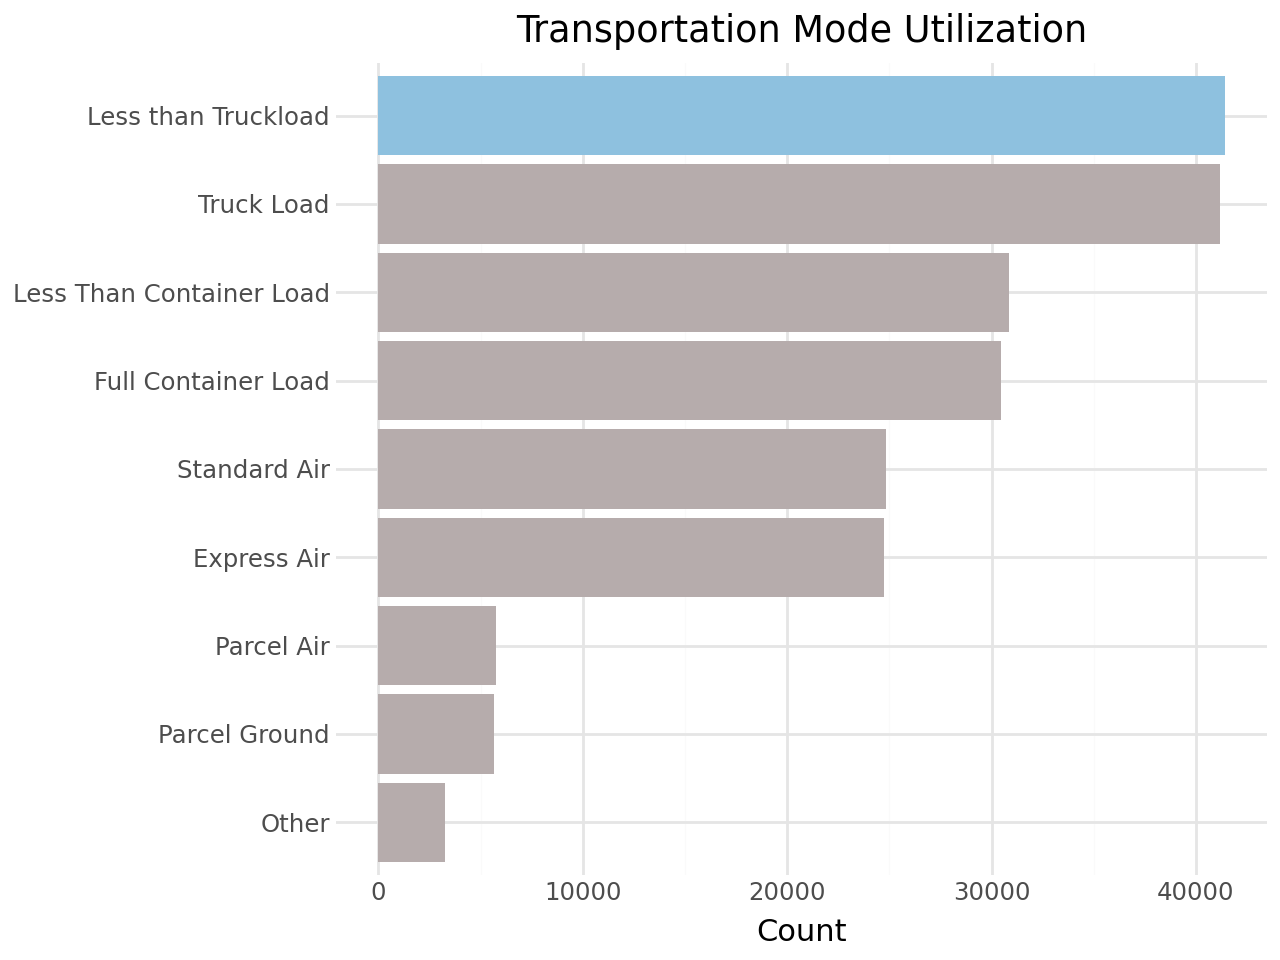

In [24]:
# create visualization for most utilized transportation mode

# create new dataframe for transportation modes
mode_count = transportation['mode'].value_counts()

mode_df = mode_count.reset_index()
mode_df.columns = ['mode', 'count'] 

# Sort from most to least utilized
mode_df['mode'] = pd.Categorical(mode_df['mode'], categories=mode_df['mode'][::-1], ordered=True)


# Custom labels 
mode_labels = {
    'truck_load': 'Truck Load',
    'std_air': 'Standard Air',
    'parcel_air': 'Parcel Air',
    'parcel_grund': 'Parcel Ground',
    'other': 'Other',
    'less_truck_load': 'Less than Truckload',
    'less_container_load': 'Less Than Container Load',
    'full_container_load': 'Full Container Load',
    'exp_air': 'Express Air'
}

# Custom colors for highlighting
fill_colors = {mode: "#b6acac" for mode in mode_labels}
fill_colors['less_truck_load'] = "#8EC1DF"

# Create transportation mode visualization 

p = ggplot(mode_df, aes(x='mode', y='count', fill='mode')) 
    
p + geom_bar(stat='identity', ) + \
    coord_flip() + \
        labs(title='Transportation Mode Utilization', x='', y='Count') + \
            scale_x_discrete(labels=mode_labels) + \
                scale_fill_manual(values=fill_colors) + \
                theme_minimal() +\
                    theme(legend_position='none')
                  

Based off the visualization and provided data, "Less Than Truck Load" is the most utilized mode of transportation, exceeding 40,000 transportation tasks.

### Delay Feature

In [25]:
# convert shipping and invoice date columns to datetime objects and calculate delay 

transportation["shipping_date"] = pd.to_datetime(transportation["shipping_date"])
transportation["invoice_date"] = pd.to_datetime(transportation["invoice_date"])
transportation["delay"] = transportation["invoice_date"] - transportation["shipping_date"]

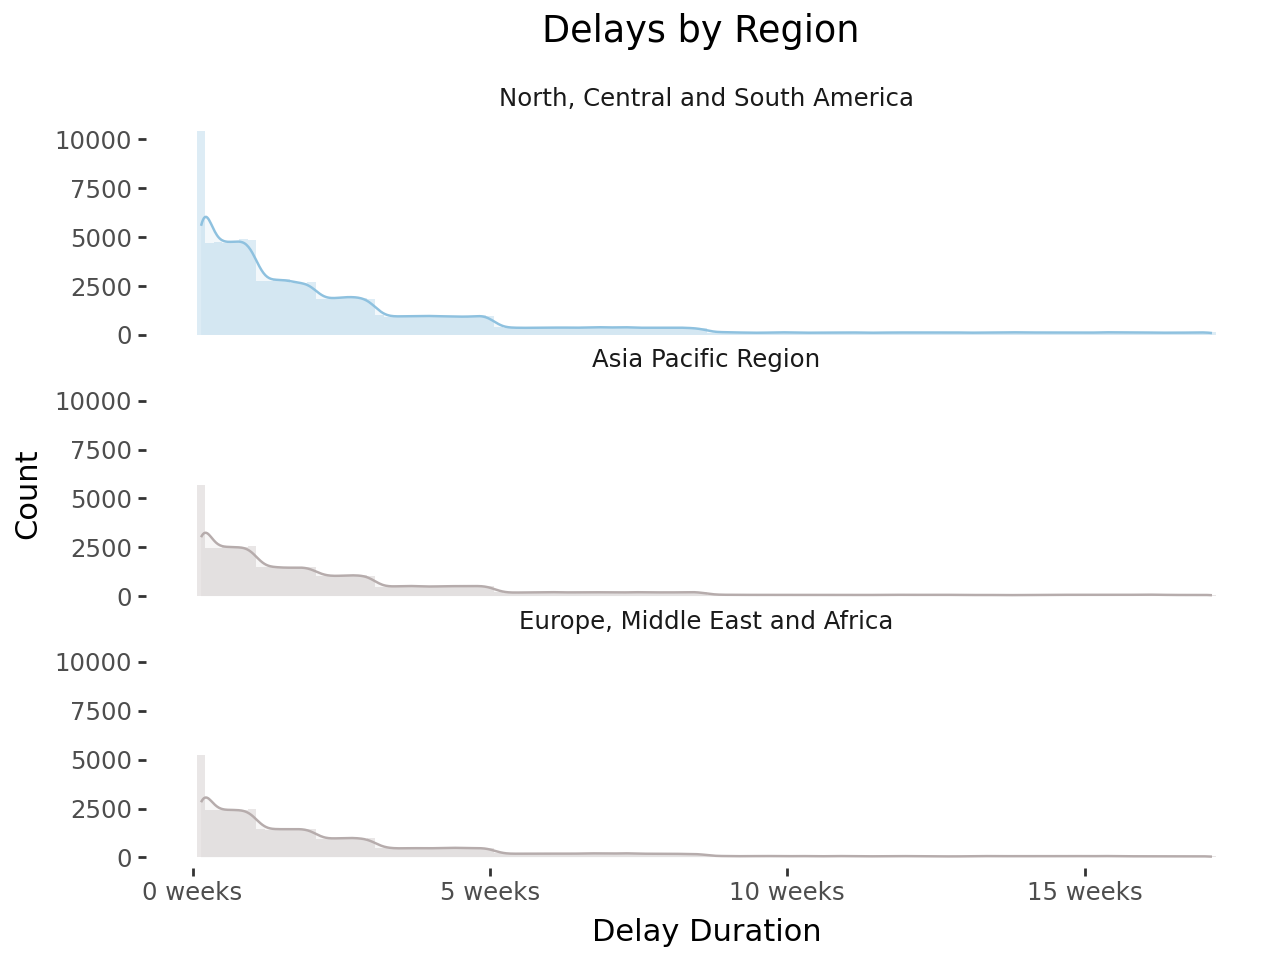

In [26]:
# Histogram and density plot of delay distribution across different regions

region_order = (transportation['region'].value_counts().sort_values(ascending=False).index.tolist())
transportation['region'] = pd.Categorical(transportation['region'],categories=region_order,ordered=True)

# Default color for all regions
region_colors = {region: "#b6acac" for region in transportation['region'].unique()}
region_colors['AMER'] = "#8EC1DF"

# Custom labels for facets
region_labels = {'AMER': 'North, Central and South America', 'APAC': 'Asia Pacific Region', 'EMEA': 'Europe, Middle East and Africa'}

p = ggplot(transportation, aes(x='delay', fill='region'))

p + geom_histogram(binwidth=1, alpha=0.3, position='identity') + \
    geom_density(aes(x='delay', y=after_stat('count'), group='region',color= 'region'), alpha=0.1, bw =1) + \
    labs(title='Delays by Region \n',
         x='Delay Duration',
         y='Count',
         fill='Region',
         color='Region') + \
    theme_tufte() + \
    theme(legend_position='none') +\
    facet_wrap('~region', ncol=1, labeller=region_labels)+ \
    scale_fill_manual(values=region_colors) + \
    scale_color_manual(values=region_colors)



This visualization compares the distribution of delays with a combined histogram and density plot across global regions, broken down (faceted) respectively for quicker comprehension. From the visualization, it can be determined that North, Central, and South America experience the highest frequency of delays, especially in the 0–5 week range. The Asia Pacific and EMEA regions show flatter distributions, suggesting more evenly spread/less frequent delays.

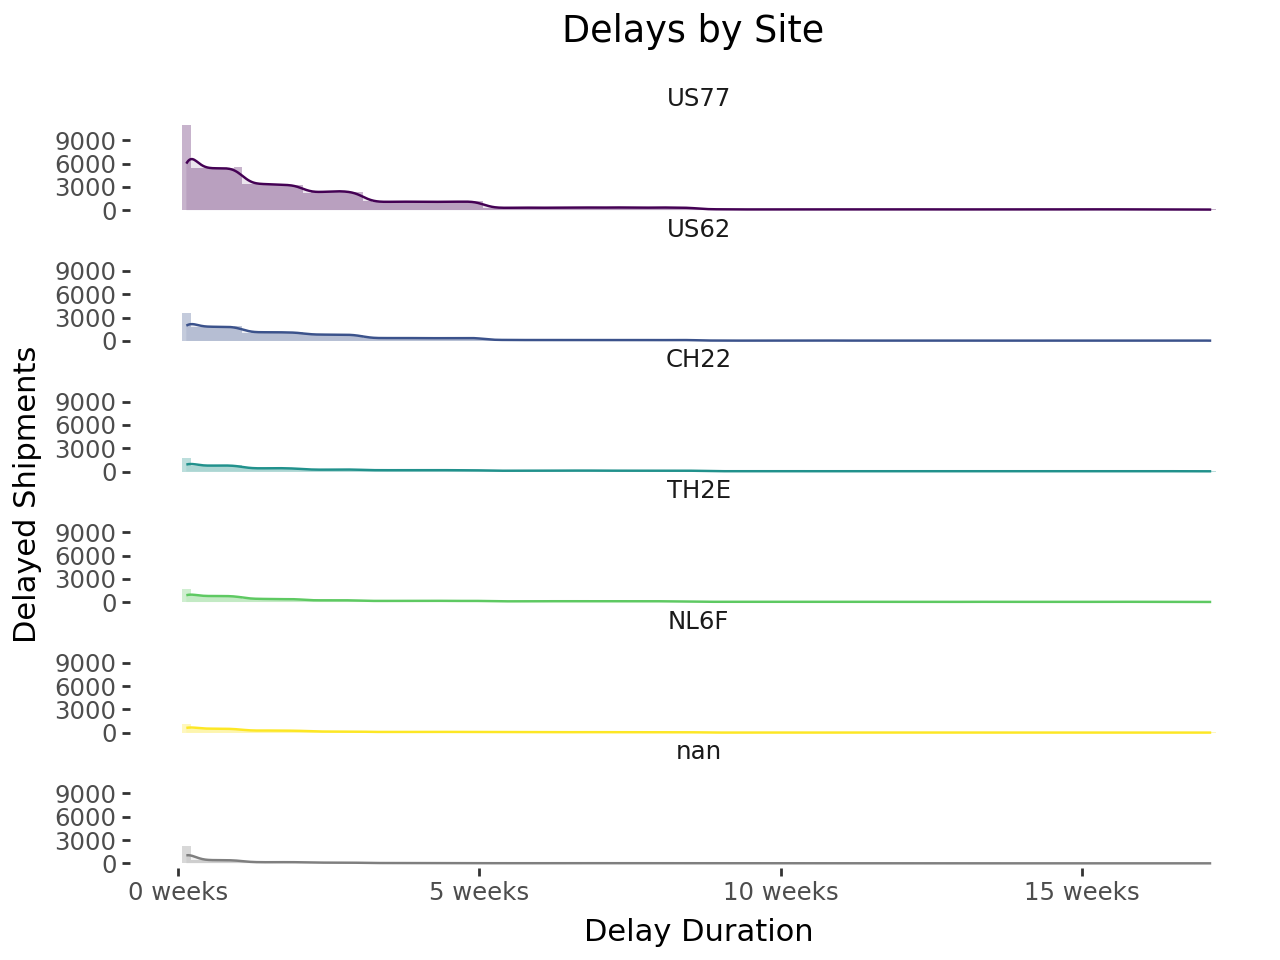

In [27]:
# Histogram and density plot of delay distribution across different sites
site_order = (transportation.groupby('site')['delay'].count().sort_values(ascending=False).index.tolist())
transportation['site'] = pd.Categorical(transportation['site'], categories=site_order, ordered=True)

# create visual using histogram and density plot
p = ggplot(transportation, aes(x='delay', fill='site')) 

p + geom_histogram(binwidth=1, alpha=0.3, position='identity') + \
    geom_density(aes(x='delay', y=after_stat('count'), group='site', color='site'), alpha=0.1, bw=1) + \
        labs(title='Delays by Site \n',
         x='Delay Duration',
         y='Delayed Shipments',
         fill='Site',
         color='Site') + \
    theme_tufte() + \
    theme(legend_position='none') + \
    facet_wrap('~site', nrow=6)


This visualization highlights the US77 site as the most significant, with a notably high initial delay count that sharply declines over time. Unlike the other regions, which show relatively stable or gently decreasing delay patterns, US77 begins with nearly 9,000 delays and drops dramatically across the 15-week span. US77 being highlighted as the most significant corresponds to the previous visualization as the site is located within North America.

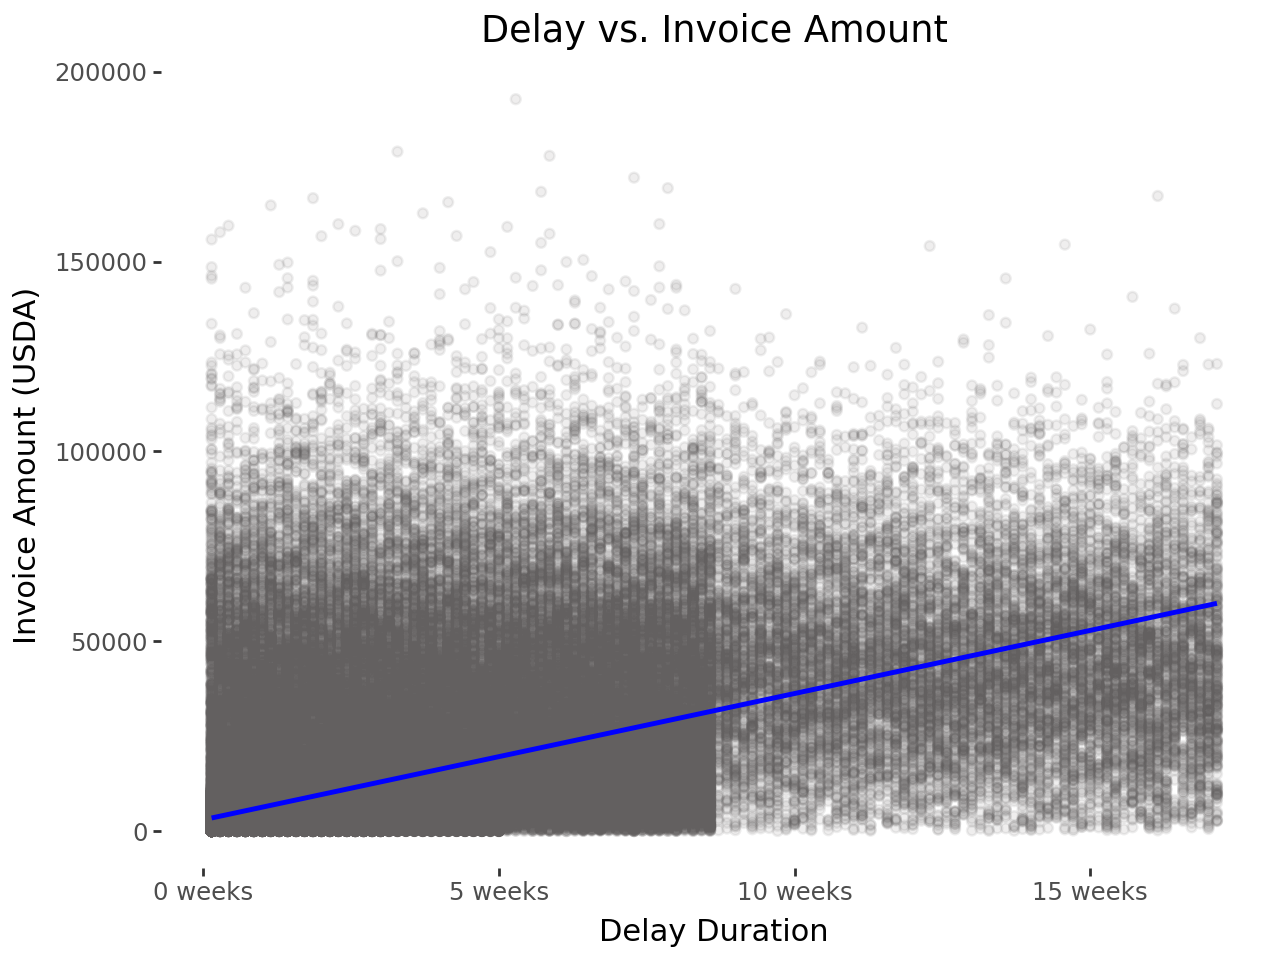

In [ ]:
# delay feature and invoice amount

p = ggplot(transportation, aes(x='delay', y='usda_invoice_amount'))

p + geom_point(alpha=0.1, color="#636060") + \
    geom_smooth(method='lm', color="blue", se=False) + \
    scale_y_continuous() + \
    labs(x="Delay Duration", y="Invoice Amount (USDA)", title="Delay vs. Invoice Amount") + \
    theme_tufte()



A scatter plot was used to showcase the quantitative variables and to determine if a relationship exists between invoice amount and delay duration. Given that the data set is quite large, the `geom_jitter` function was initially used to break up areas with dense plotting. However, this method did not alleviate readability issues and therefore, a random sample was utilized to preserve overall trend. The resulting scatter plot illustrates a positive relationship between delay duration and invoice amount, suggesting that longer delays are generally associated with higher invoice values.


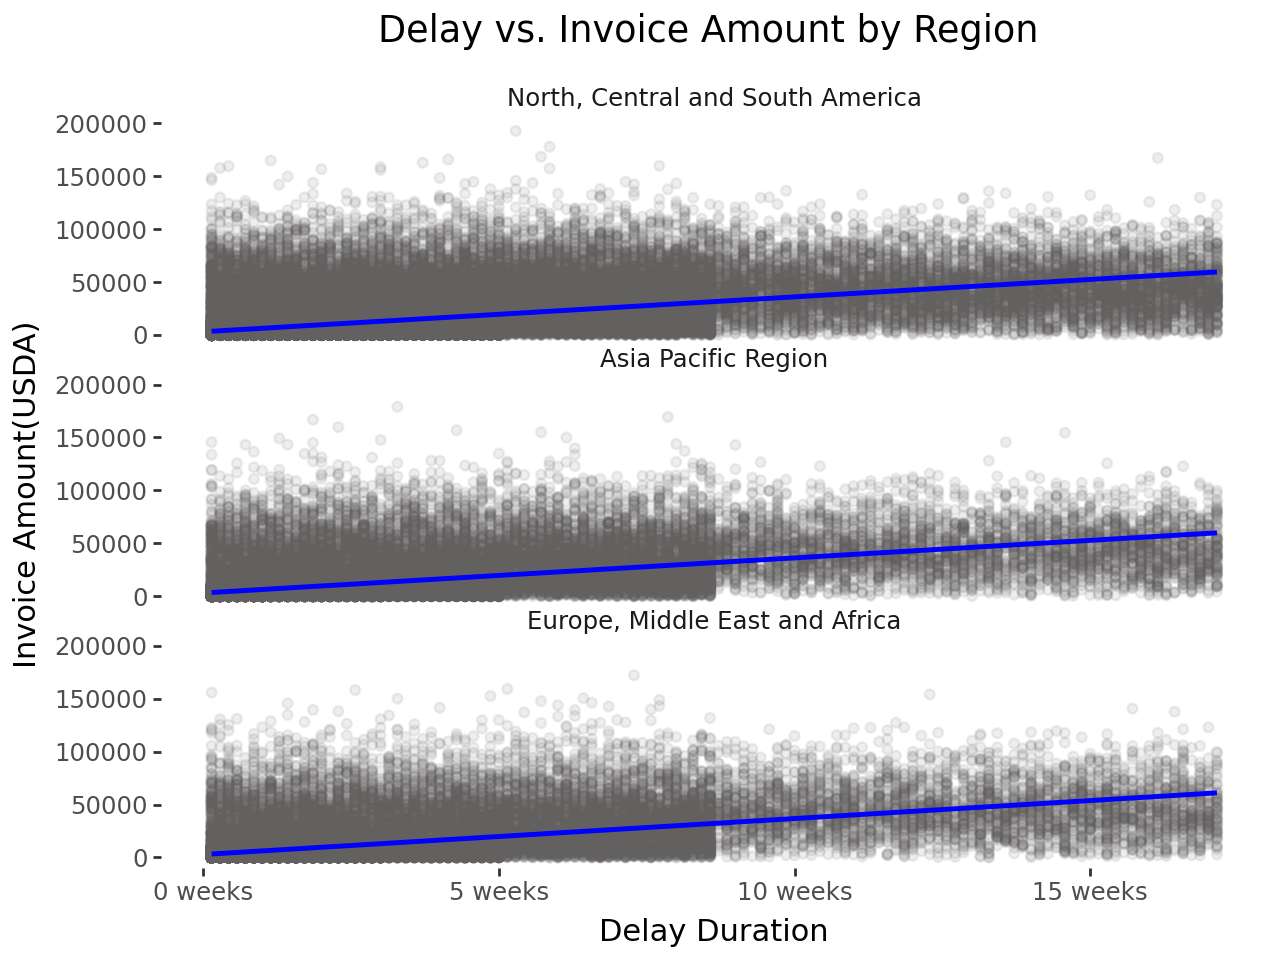

In [38]:
# delay versus invoice amount by region

# Custom labels for facets
region_labels = {'AMER': 'North, Central and South America', 'APAC': 'Asia Pacific Region', 'EMEA': 'Europe, Middle East and Africa'}

p = ggplot(transportation, aes(x='delay', y='usda_invoice_amount', color='region'))

p + geom_point(alpha=0.1, size=1.5, color="#636060") + \
    geom_smooth(method='lm',se=False, color="blue") + \
    scale_y_continuous() + \
    labs(x="Delay Duration", y="Invoice Amount(USDA)", title="Delay vs. Invoice Amount by Region \n") + \
    theme_tufte() + \
        facet_wrap('region', labeller=region_labels, nrow=3) + \
        theme(legend_position='none')
   

Based of this plot, delays tend to come with bigger invoice amounts across all three regions. While the plots dots scattered over a wide-area, the upward trend lines indicates that more weeks something is delayed, the more expensive is, such as the case with backordered items. The Americas stand out with the steepest climb, which might mean delays there effect consumers the most. 


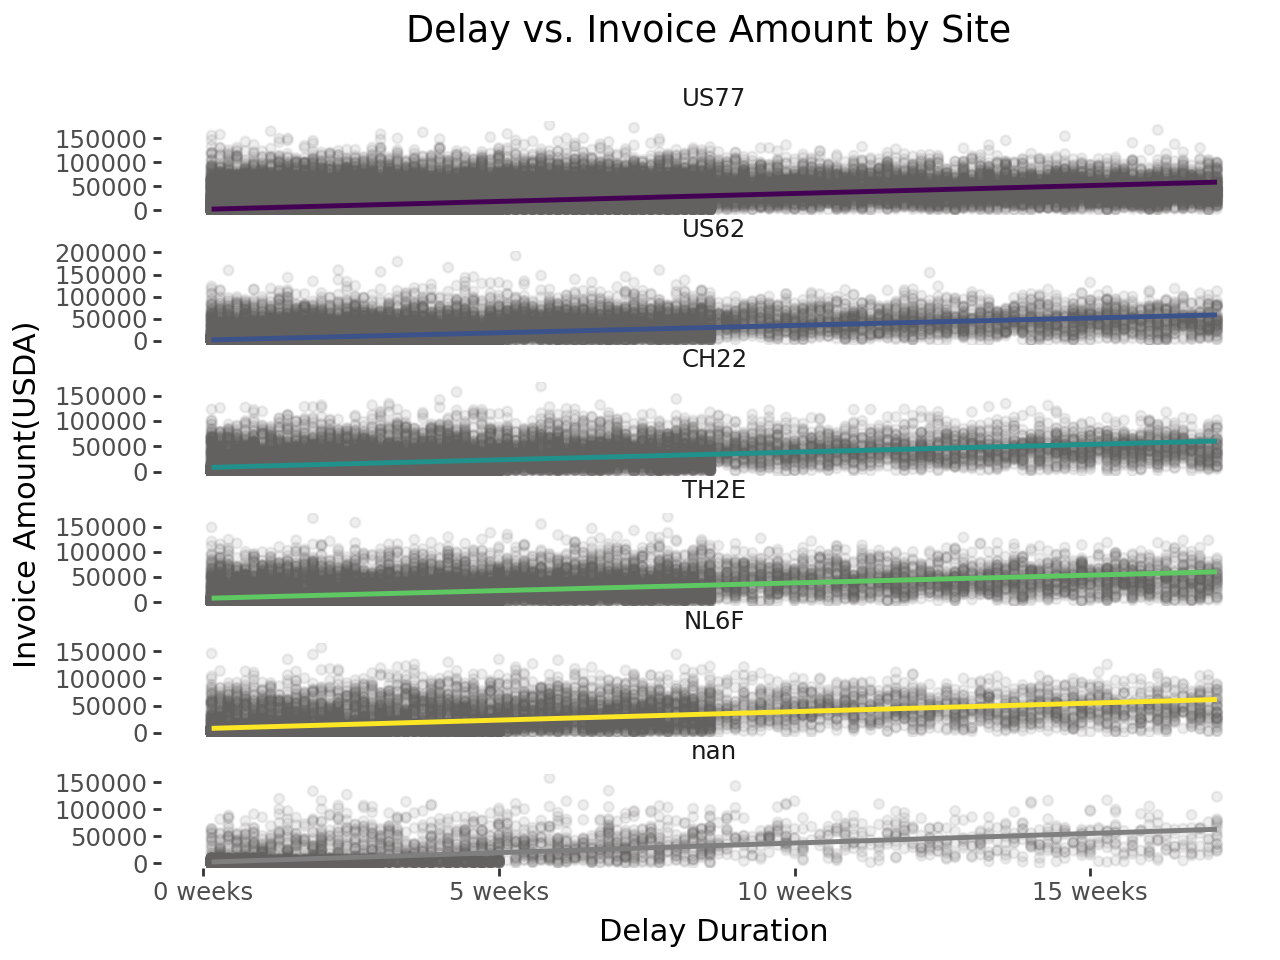

In [40]:
# delay versus invoice amount by site

p = ggplot(transportation, aes(x='delay', y='usda_invoice_amount', color='site'))

p + geom_point(alpha=0.1, size=1.5, color="#636060") + \
    geom_smooth(method='lm',se=False) + \
    scale_y_continuous() + \
    labs(x="Delay Duration", y="Invoice Amount(USDA)", title="Delay vs. Invoice Amount by Site \n") + \
    theme_tufte() + \
        facet_wrap('site', labeller=region_labels, nrow=6,scales='free_y') + \
        theme(legend_position='none')
   

Most locations show that when delays stretch out, the invoice amounts tend to climb with it. This could possibly be due to larger, more complex orders that takelonger to process. Site US77 and the nan site stands out with a steeper trend line, meaning delays there are more tightly linked to higher costs. This could point to bottlenecks or more costly shipments getting stuck in transit.


### Delay by Mode

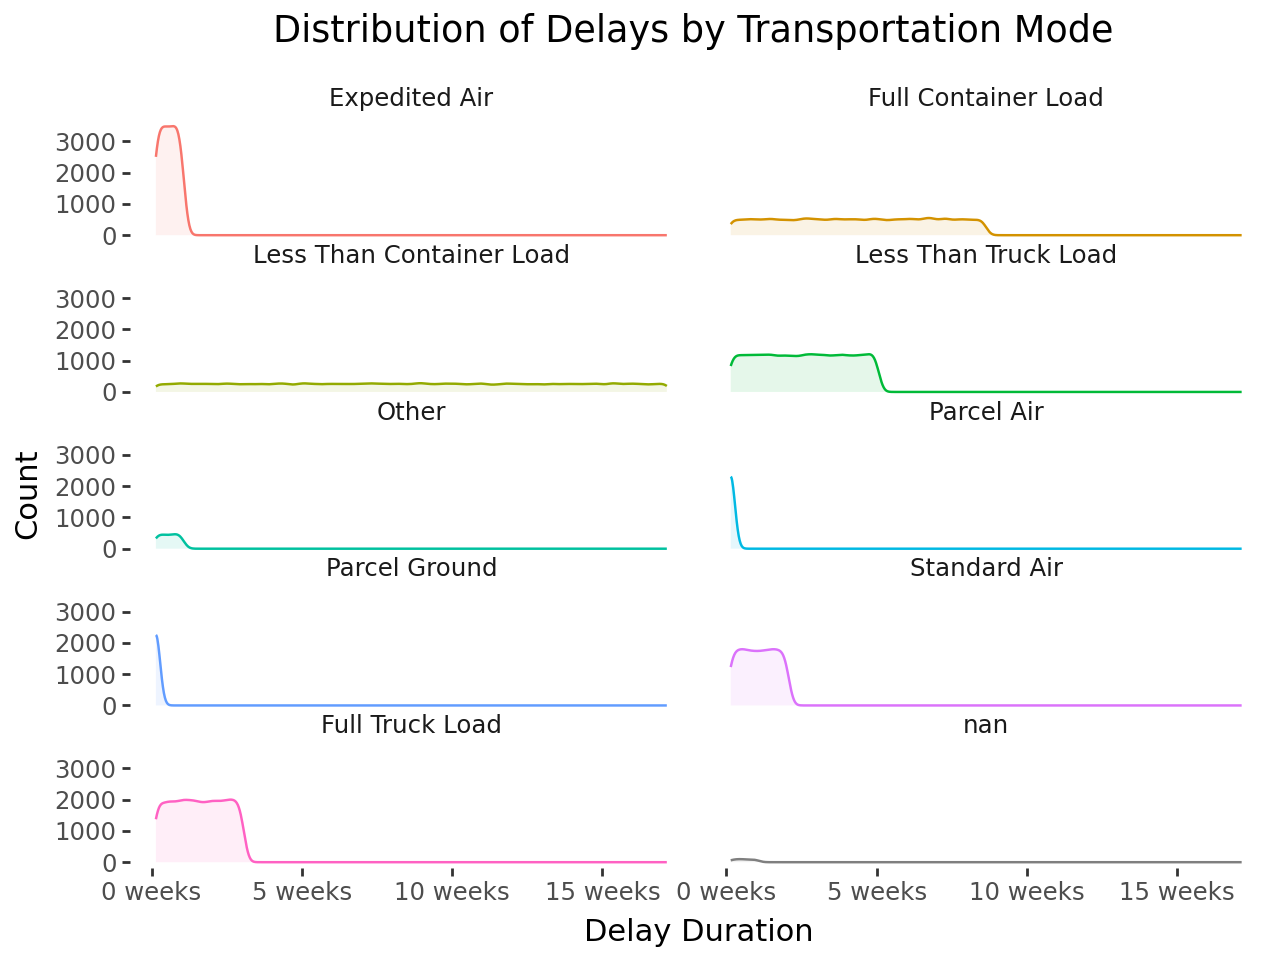

In [41]:
# Custom labels for facets
mode_labels = {'exp_air': 'Expedited Air', 'std_air': 'Standard Air', 'full_container_load': 'Full Container Load','less_container_load':'Less Than Container Load','truck_load':'Full Truck Load', 'less_truck_load': 'Less Than Truck Load','parcel_grund':'Parcel Ground','parcel_air':'Parcel Air','other':'Other'}


# Create density plot

p = ggplot(data=transportation, mapping=aes(x='delay',fill='mode'))

p + geom_density(aes(x='delay', y=after_stat('count'), group='mode',color= 'mode'), alpha=0.1, bw =1) + \
    labs(title='Distribution of Delays by Transportation Mode \n',
         x='Delay Duration',
         y='Count',
         fill='mode',
         color='mode') + \
    theme_tufte() + \
    theme(legend_position='none') +\
     facet_wrap('~mode', nrow=6, labeller=mode_labels)

In order to best showcase the distribution of delays by transportation mode, histogram, density plots, and combined plots were all explored. After comparing the visualizations, it was determined that the density plot made for the most insightful visualization as it provided a clear distinction on which mode of transportation had the most delays in comparison to the other categories. 

From the visualization, it can be cleary determined that "Expedited Air" and "Parcel Ground" exhibit the highest concentration of short-term delays (0-3 weeks). In contrast, modes like "Full Container Load" and "Less Than Truck Load" show broader distributions, indicating more variability and longer delays. Based off this, it may be suggested that WD-40 adjust their selected transportation modes for more stable methods and reduce overall transportatipn costs. For example, parcel ground only has delay issues in the first few weeks, but remains relatively stable ater that. WD-40 could potentially adjust their shipping speed and use this method to where it will benefit both them and their customers.

### References

* Copilot. “Asking Copilot How to Make a Random Sample in Plotnine for Python.” Microsoft Copilot, 10 Oct. 2025.
*Guidance provided on using `pandas.sample()` and parameter explanation.*


* Data to Viz. “Play with Your Histogram Bin Size.” Data to Viz, https://www.data-to-viz.com/caveat/bin_size.html. Accessed 9 Oct. 2025.

* “Determining Bin Width: A Step-by-Step Guide for Creating Accurate and Informative Histograms.” Senioritis, https://senioritis.io/mathematics/math/determining-bin-width-a-step-by-step-guide-for-creating-accurate-and-informative-histograms/. Accessed 7 Oct. 2025.

* Holtz, Yan. “How to Avoid Overplotting with Python.” The Python Graph Gallery, https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/. Accessed 10 Oct. 2025.

* GeeksforGeeks.“R Language | ggplot2 Cheat Sheet.” *GeeksforGeeks*, 6 July 2022, https://www.geeksforgeeks.org/r-language/ggplot2-cheat-sheet/. Accessed 6 Oct. 2025.

* GeeksforGeeks. “Reset Index in Pandas Dataframe.” *GeeksforGeeks*, 27 Apr. 2021, https://www.geeksforgeeks.org/python/reset-index-in-pandas-dataframe/. Accessed 6 Oct. 2025.

* "geom_density – plotnine 0.15.0." Plotnine, https://plotnine.org/reference/geom_density.html. Accessed 7 Oct. 2025.

* “geom_histogram.” Plotnine Documentation, https://plotnine.org/reference/geom_histogram.html. Accessed 7 Oct. 2025.

* Plotnine. “Facet Wrap – Plotnine 0.15.0a5.” Plotnine Documentation, https://plotnine.org/reference/examples/facet_wrap.html. Accessed 10 Oct. 2025.

* "Reverse Order of Discrete X-Axis in Plotnine." Stack Overflow, 12 Nov. 2020, https://stackoverflow.com/questions/64575436/reverse-order-of-discrete-x-axis-in-plotnine. Accessed 8 Oct. 2025.

* Stack Overflow contributors. “Identifying the Most Frequently Occurring Value/String in a Column.” *Stack Overflow*, 14 Feb. 2019, https://stackoverflow.com/questions/54819017/identifying-the-most-frequently-occurring-value-string-in-a-column. Accessed 6 Oct. 2025.

* “What Exactly Does the Pandas Random_State Do?” Stack Overflow, 20 July 2017, https://stackoverflow.com/questions/45211624/what-exactly-does-the-pandas-random-state-do. Accessed 10 Oct. 2025.

## Assignment 3

In [43]:
# Set up shell for data, libraries, and packages

import pandas as pd
from plotnine import*

transportation = pd.read_csv('../data/tr_data_22_24.csv')

### Delay by Distribution Mode

In [44]:
# Delay feature

transportation["shipping_date"] = pd.to_datetime(transportation["shipping_date"])
transportation["invoice_date"] = pd.to_datetime(transportation["invoice_date"])
transportation["delay"] = transportation["invoice_date"] - transportation["shipping_date"]

In [45]:
transportation 

delay_by_mode = transportation[['delay', 'mode']].dropna(subset=['delay', 'mode'])
delay_by_mode['mode'] = pd.Categorical(delay_by_mode['mode'], categories=delay_by_mode['mode'].unique(), ordered=True)

# Sort by mode (preserved order) and delay descending
delay_by_mode_sorted = delay_by_mode.sort_values(by=['mode', 'delay'], ascending=[True, False])

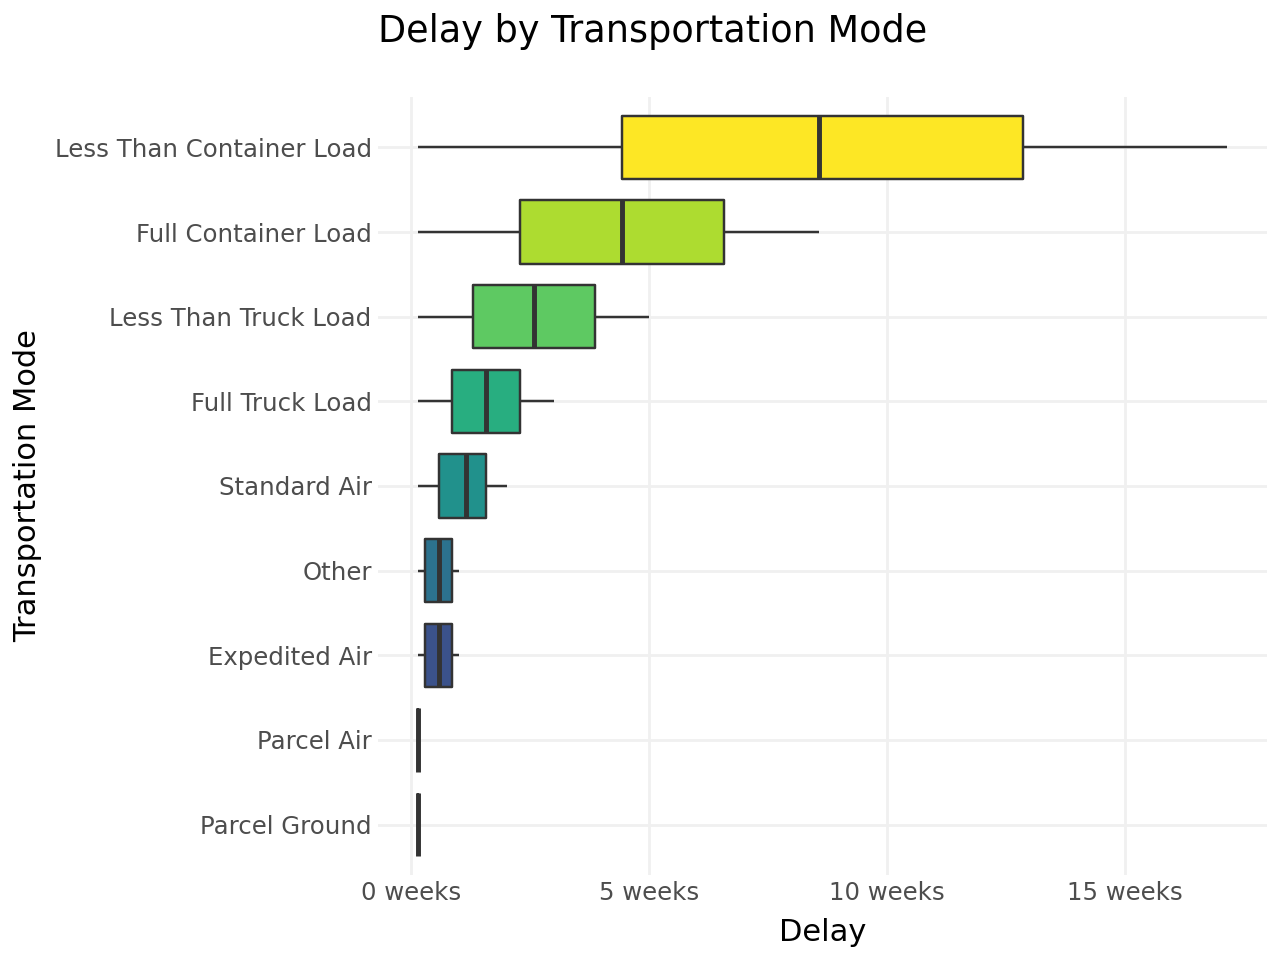

In [46]:
# Custom labels for facets

mode_labels = {
    'exp_air': 'Expedited Air',
    'std_air': 'Standard Air',
    'full_container_load': 'Full Container Load',
    'less_container_load': 'Less Than Container Load',
    'truck_load': 'Full Truck Load',
    'less_truck_load': 'Less Than Truck Load',
    'parcel_grund': 'Parcel Ground',
    'parcel_air': 'Parcel Air',
    'other': 'Other'
}

# excluding NA values and the other categories

delay_by_mode = transportation[['delay', 'mode']].dropna(subset=['delay', 'mode'])
delay_by_mode_sorted = delay_by_mode.sort_values(by=['mode', 'delay'])

#order from largest to smallest delay
mode_order = delay_by_mode.groupby('mode')['delay'].mean().sort_values(ascending=False).index[::-1]
delay_by_mode['mode'] = pd.Categorical(delay_by_mode['mode'], categories=mode_order, ordered=True)

# a boxplot visualization of delay broken down by transportation mode 

p = ggplot(data=delay_by_mode, mapping=aes(x='mode', y='delay', fill='mode'))


custom_theme = theme(
    legend_position='none',
    axis_ticks_major_x=element_blank(),
    axis_ticks_major_y=element_blank(),
    panel_background=element_rect(fill="none"),
    panel_grid_major=element_line(color="#F0F0F0"),
    strip_background=element_rect(color='white', fill='white'),
    strip_text_y=element_text(size=12))

 
# create boxplot with custom theme

p1 = p + geom_boxplot() +  coord_flip() + \
    labs(x='Transportation Mode', y='Delay', title='Delay by Transportation Mode \n') +\
        scale_x_discrete(labels=mode_labels) +\
        guides(fill=False) + \
        theme( plot_title=element_text(ha='left')) +\
            custom_theme 
    
        
p1

Based on the boxplot, it can be determined that delivery delays vary widely by transportation mode.  Less Than Container Load has the longest and most variable delays, with some shipments taking up to 15 weeks. Full Container Load, Less Than Truck Load, and Full Truck Load show moderate delays, typically ranging from 2 to 6 weeks while air transportation options, especially Expedited Air and Parcel Air, are faster and more consistent, generally under 2 weeks. Parcel Ground stands out as the most efficient mode, with delays centered around 1 week. Ultimately, these patterns suggest air and parcel services are best for time-sensitive shipments, while ocean and truck modes may suit less urgent deliveries.

In [47]:
# save the plot as a PNG file with specified dimensions and resolution using ggsave function and add to the 'plots' folder
p1.save('../plots/delay_dist_by_mode.png', width=12, height=6, dpi=300)

c:\Users\ccono\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 6 in image.
c:\Users\ccono\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/delay_dist_by_mode.png


### Invoice Time Series

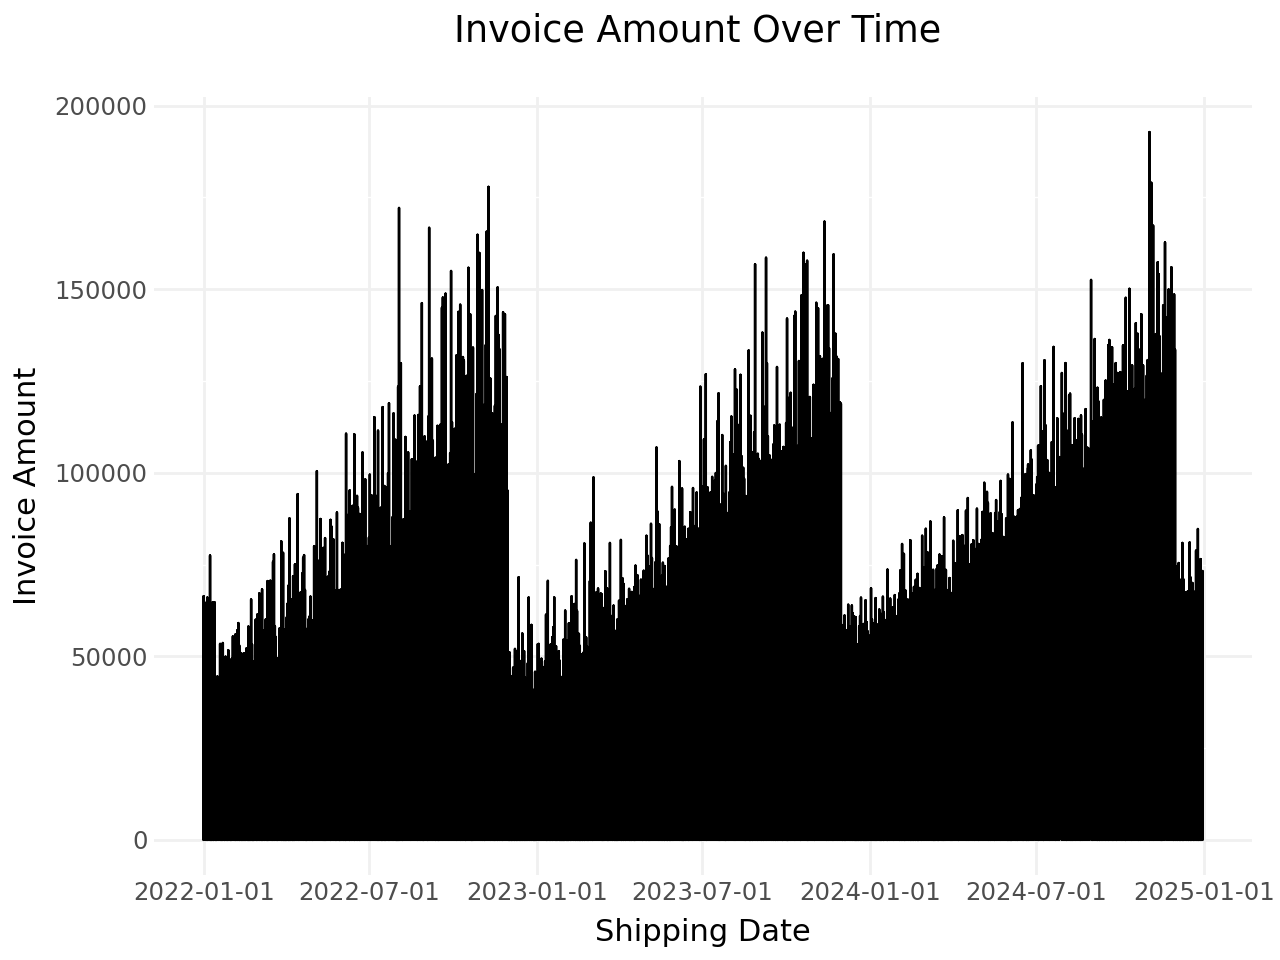

In [48]:
# create visualization (line chart) of the time-series data for invoice amounts by shipping date

transportation_sorted = (
    transportation
    .sort_values('shipping_date')
)

p = ggplot(data=transportation_sorted, mapping=aes(x='shipping_date', y='usda_invoice_amount'))
p + geom_line() + labs(x='Shipping Date',
                       y='Invoice Amount',
                       title='Invoice Amount Over Time \n') + \
                       custom_theme
    

This initial visualization is overly dense and cluttered, making it difficult to discern meaningful patterns or trends. The excessive number of vertical lines obscures seasonality and prevents clear comparisons across time periods.

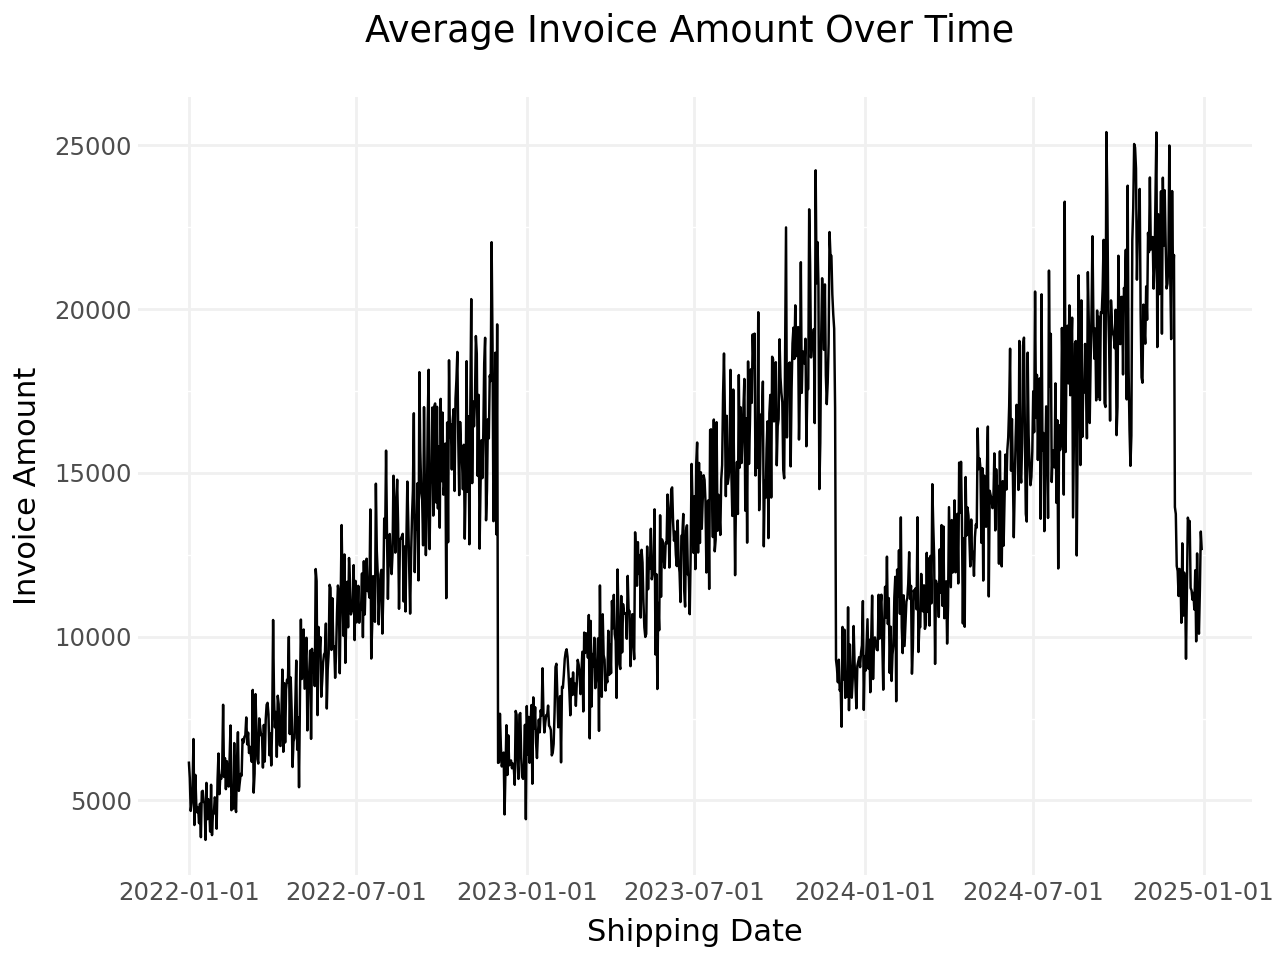

In [49]:
transportation_sorted = (
    transportation
    .groupby('shipping_date', as_index=False)['usda_invoice_amount']
    .mean()
    .sort_values('shipping_date')
)

p = ggplot(data=transportation_sorted, mapping=aes(x='shipping_date', y='usda_invoice_amount'))
p + geom_line() + labs(x='Shipping Date',
                        y='Invoice Amount', 
                        title='Average Invoice Amount Over Time \n') + \
                            custom_theme

This second version provides a little more clarity, by having shipping dates and invoice amounts grouped together and averaged. The smoother line makes it easier to identify cyclical patterns and compare year-over-year changes but still fails to provide a clear picture for trend analysis. 

In [50]:
# extract year and month from shipping_date and sort in chronological order
transportation_sorted['year'] = transportation_sorted['shipping_date'].dt.year
transportation_sorted['month'] = transportation_sorted['shipping_date'].dt.month

# sort by year and month
transportation_sorted = transportation_sorted.sort_values(['year', 'shipping_date'])
monthly_average = transportation_sorted.groupby(['year','month'])['usda_invoice_amount'].mean().reset_index()

# Create a temporary datetime column from year and month
monthly_average['date'] = pd.to_datetime(monthly_average[['year', 'month']].assign(day=1))

# Format month as abbreviated name
monthly_average['month'] = monthly_average['date'].dt.strftime('%b')

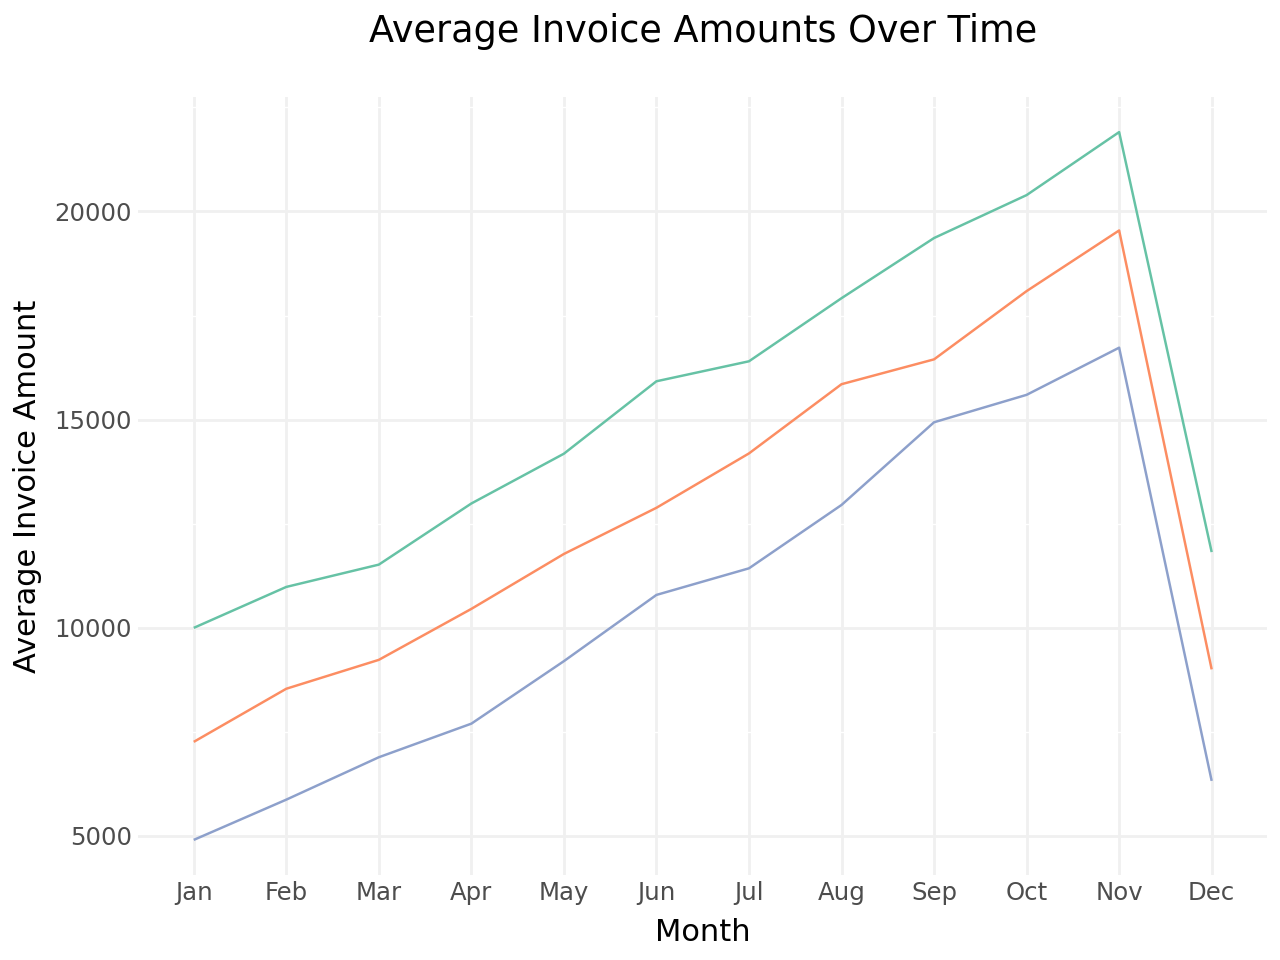

In [51]:
# order time-series data chronilogically

# Sort years from most recent to oldest
year_order = sorted(monthly_average['year'].unique(), reverse=True)

# Convert 'year' to ordered categorical with reversed order
monthly_average['year'] = pd.Categorical(monthly_average['year'], categories=year_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to ordered categorical
monthly_average['month'] = pd.Categorical(monthly_average['month'], categories=month_order, ordered=True)


p = ggplot(data=monthly_average, mapping=aes(x='month', y='usda_invoice_amount', group='year', color='factor(year)'))
p2 = p + geom_line()  +\
        labs(x='Month', 
             y='Average Invoice Amount', 
             title='Average Invoice Amounts Over Time\n',
             color='Year') + \
                scale_color_brewer(type='qual', palette='Set2') +\
theme(panel_background=element_rect(fill="none"),
    panel_grid_major=element_line(color="#F0F0F0")) +\
    custom_theme


p2

This visualization is a further improvement as it aggregates by month and separates categories, making seasonal patterns and categorylevel differences immediately clear. The cleaner layout and distinct color per year better supports quick comparisons. This visualization also highlights the sharp year-end drops, which might be missed in the previous,noisier versions, especially since the previous dates were not ordered chronilogically.

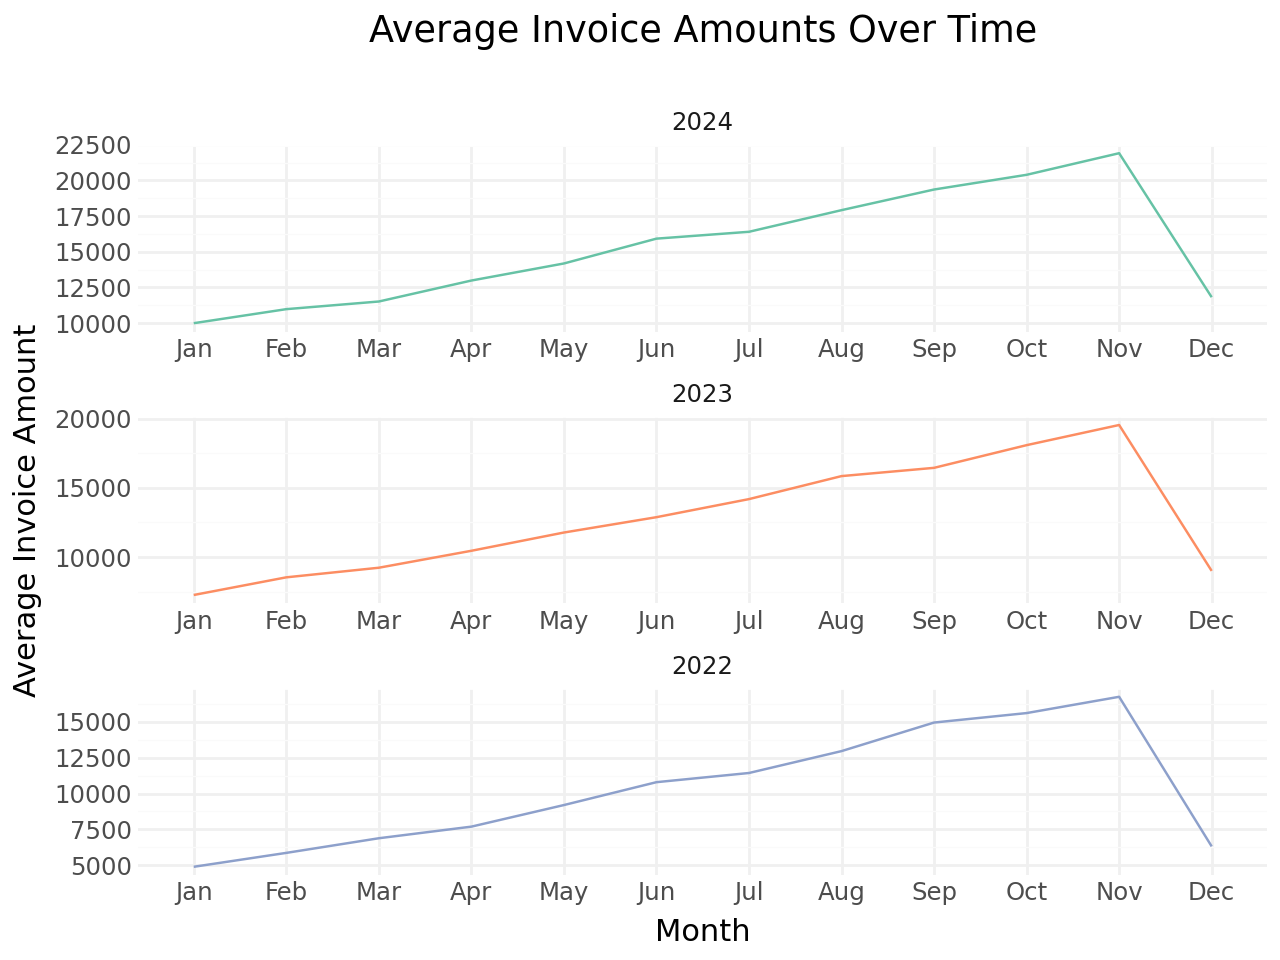

In [52]:
# order time-series data chronilogically

# Sort years from most recent to oldest
year_order = sorted(monthly_average['year'].unique(), reverse=True)

# Convert 'year' to ordered categorical with reversed order
monthly_average['year'] = pd.Categorical(monthly_average['year'], categories=year_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to ordered categorical
monthly_average['month'] = pd.Categorical(monthly_average['month'], categories=month_order, ordered=True)

# Create visualization for invoice amounts over time 
p = ggplot(data=monthly_average, mapping=aes(x='month', y='usda_invoice_amount', group='year', color='factor(year)'))

p3= p + geom_line() +\
    facet_wrap('~year', nrow=3, scales= 'free') +\
        labs(x='Month', 
             y='Average Invoice Amount', 
             title='Average Invoice Amounts Over Time\n') + \
theme_minimal() +\
scale_color_brewer(type='qual', palette='Set2') +\
theme(legend_position='none') +\
custom_theme




p3

This final version is even stronger for year-over-year comparison. By having each year faceted into its own subplot, it preserves monthly seasonality while making growth trends visually distinct. It also reduces cognitive load, enabling any stakeholders to easily evaluate year-over-year performance trends as well as identify recurring seasonal patterns.

In [53]:
# save the plot as PNG
p3.save('../plots/avg_invoice_over_time.png', width=12, height=6, dpi=300)

c:\Users\ccono\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 6 in image.
c:\Users\ccono\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/avg_invoice_over_time.png


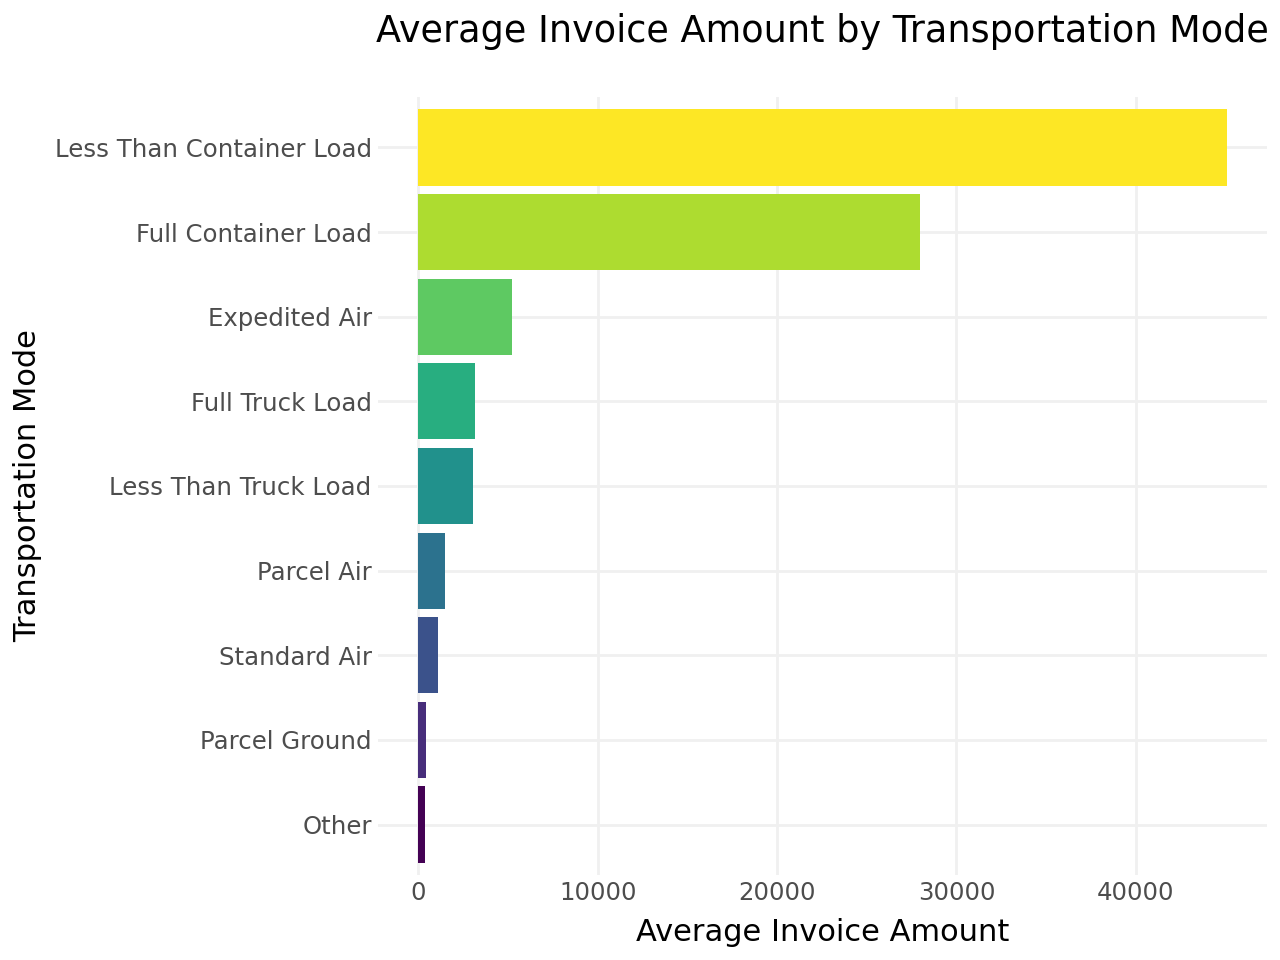

In [54]:
#Average invoice amount by transportation mode
avg_invoice_by_mode = (
    transportation.groupby('mode')['usda_invoice_amount']
    .mean()
    .reset_index()
    .sort_values(by='usda_invoice_amount', ascending=False)
)

# Set mode as a categorical variable with ordered levels
avg_invoice_by_mode['mode'] = pd.Categorical(
    avg_invoice_by_mode['mode'],
    categories=avg_invoice_by_mode['mode'][::-1],
    ordered=True
)


# plot time series data as line chart

p = ggplot(data=avg_invoice_by_mode, mapping=aes(x='mode', y='usda_invoice_amount', fill='mode'))

p + geom_col() + \
    coord_flip() + \
    labs(x='Transportation Mode', y='Average Invoice Amount', title='Average Invoice Amount by Transportation Mode\n') + \
    scale_x_discrete(labels=mode_labels) + \
    guides(fill=False) + \
    theme(legend_position='none') + \
    custom_theme



C:\Users\ccono\AppData\Local\Temp\ipykernel_23424\1873256585.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


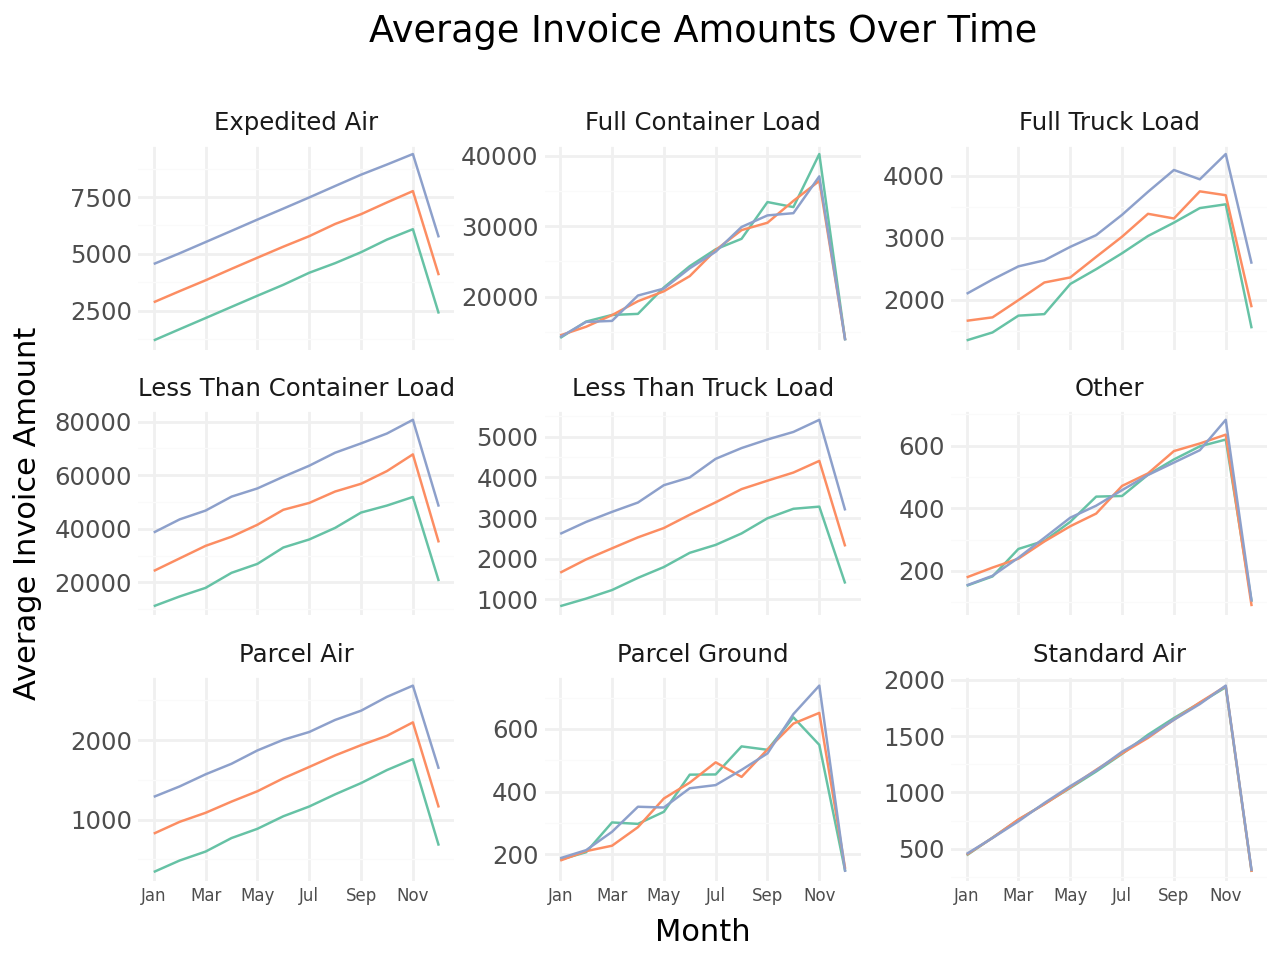

In [61]:
# Convert shipping_date to datetime
transportation['shipping_date'] = pd.to_datetime(transportation['shipping_date'])

# Extract abbreviated month names
transportation['month_abbr'] = transportation['shipping_date'].dt.strftime('%b')  # Jan, Feb, etc.
month_abbr_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
transportation['month_abbr'] = pd.Categorical(transportation['month_abbr'],
                                              categories=month_abbr_order,
                                              ordered=True)

# Extract year
transportation['year'] = transportation['shipping_date'].dt.year

# Aggregate invoice amounts by year, abbreviated month, and mode
monthly_summary = (
    transportation.groupby(['year', 'month_abbr', 'mode'])['usda_invoice_amount']
    .median()
    .reset_index()
)

# Apply mode label mapping
mode_labels = {
    'exp_air': 'Expedited Air',
    'std_air': 'Standard Air',
    'full_container_load': 'Full Container Load',
    'less_container_load': 'Less Than Container Load',
    'truck_load': 'Full Truck Load',
    'less_truck_load': 'Less Than Truck Load',
    'parcel_grund': 'Parcel Ground',
    'parcel_air': 'Parcel Air',
    'other': 'Other'
}
monthly_summary['mode'] = monthly_summary['mode'].map(mode_labels)

# Plot
p = ggplot(data=monthly_summary,
           mapping=aes(x='month_abbr', y='usda_invoice_amount', group='year', color='factor(year)'))

p4 = (p + geom_line()
        + facet_wrap('~mode', nrow=3, scales='free_y')
        + labs(x='Month',
               y='Average Invoice Amount',
               title='Average Invoice Amounts Over Time\n')
        + theme_minimal()
        + scale_color_brewer(type='qual', palette='Set2')
        + scale_x_discrete(breaks=['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'])  # fewer ticks
        + theme(legend_position='none',
                axis_text_x=element_text(size=6))  # smaller font size, no rotation
        + custom_theme)

p4

### Cost Estimation and Forecasting

The time-series patterns in the invoice amounts show a clear and consistent seasonal trend across all three years, with average invoice amounts steadily increase from January through November, then drop in December. The repeated pattern suggests strong seasonality, possibly tied to peak shipping periods, inventory buildup before holidays, and year-end budget cycles.

A visualization was also created to display Average Invoice Amount by Transportation. The resulting chart shows that Less Than Container Load and Full Container Load have the highest average invoice amounts, suggesting these modes are not only slower (as seen in the boxplot) but also more expensive. In contrast, Parcel Ground, Standard Air, and Parcel Air are among the least costly options.


A crude graph (p4) was also created to visualize Average Invoice Amounts over time and broken down by mode. Doing so revealed distinct seasonal and cost dynamics across transportation modes with showing a consistent rise in average invoice amounts from January to November, followed by a dip in December which mirrors the broader time-series trend. However, the magnitude and variability of these trends vary differ by mode. By evaluating these trends , businesses can improve cost forecasting by showing how invoice amounts change over time as well as shipping method by estimating costs by looking at both the month and the transportation mode, choose the shipping methods that fit their budget and timing needs or constraints, and plan ahead for expensive modes like LCL and FCL, which may need early booking or alternate routes during peak seasons.



### References


* DataScientyst. How to Extract Month and Year from DateTime Column in Pandas. 28 Oct. 2022, https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/. Accessed 29 Oct. 2025.

* Data Viz with Python and R. “How to Specify the Order of Panes in Facet_Wrap.” *DataVizPyr*, 15 Feb. 2021, [https://datavizpyr.com/how-to-specify-the-order-of-panes-in-facet_wrap/](https://datavizpyr.com/how-to-specify-the-order-of-panes-in-facet_wrap/). Accessed 30 Oct. 2025.

* GeeksforGeeks. Time Series Plot or Line Plot with Pandas. 23 July 2025, https://www.geeksforgeeks.org/python/time-series-plot-or-line-plot-with-pandas/.


* “How to Create Boxplot from Pandas DataFrame.” *GeeksforGeeks*, 16 Oct. 2023, [https://www.geeksforgeeks.org/python/how-to-create-boxplot-from-pandas-dataframe/](https://www.geeksforgeeks.org/python/how-to-create-boxplot-from-pandas-dataframe/). Accessed 28 Oct. 2025.


* “How to Change X Axis Tick Label Names, Order and Boxplot Colour Using R Ggplot.” Stack Overflow, 9 May 2014, https://stackoverflow.com/questions/23564607/how-to-change-x-axis-tick-label-names-order-and-boxplot-colour-using-r-ggplot. Accessed 28 Oct. 2025.


* Piepenbreier, Nik. “All the Ways to Filter Pandas Dataframes.” datagy, 31 May 2020, www.datagy.io/filter-pandas/.

* Plotnine Developers. “Theme.” *Plotnine Documentation*, [https://plotnine.org/reference/theme.html](https://plotnine.org/reference/theme.html). Accessed 30 Oct. 2025.

* Plotnine Developers. “Themes Basics.” *Plotnine Documentation*, [https://plotnine.org/guide/themes-basics.html](https://plotnine.org/guide/themes-basics.html). Accessed 30 Oct. 2025.


